In [296]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats as stats
import array as ar
import seaborn as sns

In [20]:
#Dataframe yüklenmesi ve ilk beş satırının gösterilmesi
verilerKalpKriziRiskiTenYears=pd.read_csv('train.csv')
verilerKalpKriziRiskiTenYears.head(5)


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [21]:
#verilerin son 5 satırı
verilerKalpKriziRiskiTenYears.tail(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [22]:
verilerKalpKriziRiskiTenYears.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [23]:
verilerKalpKriziRiskiTenYears.info

<bound method DataFrame.info of         id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0        

In [24]:
#Eksik veri kontrolü
verilerKalpKriziRiskiTenYears.isnull()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3388,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [25]:
verilerKalpKriziRiskiTenYears.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [26]:
#Sutunlardaki eksik verileri ortalama ile doldurmak için her sutun ortalaması hesapla
#age sutun ortalaması
ageOrtalama=verilerKalpKriziRiskiTenYears['age'].mean()
#education sutun ortalaması
educationOrtalama=verilerKalpKriziRiskiTenYears['education'].mean()
#cigsPerDay  sutun ortalaması
cigsPerDayOrtalama=verilerKalpKriziRiskiTenYears['cigsPerDay'].mean()
#BMI sutun ortalaması
BMIOrtalama=verilerKalpKriziRiskiTenYears['BMI'].mean()
#totChol sutun ortalaması
totCholOrtalama=verilerKalpKriziRiskiTenYears['totChol'].mean()
#BPMeds  sutun ortalaması
BPMedsOrtalama=verilerKalpKriziRiskiTenYears['BPMeds'].mean()
#glucose sutun ortalaması,
glucoseOrtalama=verilerKalpKriziRiskiTenYears['glucose'].mean()
#heartRate sutun ortalaması
heartRateOrtalama=verilerKalpKriziRiskiTenYears['heartRate'].mean()
#prevalentStroke sutun ortalaması
prevalentStrokeOrtalama=verilerKalpKriziRiskiTenYears['prevalentStroke'].mean()
#prevalentHyp sutun ortalaması
prevalentHypOrtalama=verilerKalpKriziRiskiTenYears['prevalentHyp'].mean()
#diabetes sutun ortalaması
diabetesOrtalama=verilerKalpKriziRiskiTenYears['diabetes'].mean()
#sysBP sutun ortalaması
sysBPOrtalama=verilerKalpKriziRiskiTenYears['sysBP'].mean()
#diaBP sutun ortalaması
diaBPOrtalama=verilerKalpKriziRiskiTenYears['diaBP'].mean()





In [27]:
#şimdi fillna fonksiyonu kullanarak ekssik verileri tamamlayalım.
verilerKalpKriziRiskiTenYears['education'].fillna(educationOrtalama, inplace=True)
verilerKalpKriziRiskiTenYears['cigsPerDay'].fillna(cigsPerDayOrtalama, inplace=True)
verilerKalpKriziRiskiTenYears['BMI'].fillna(BMIOrtalama, inplace=True)
verilerKalpKriziRiskiTenYears['totChol'].fillna(totCholOrtalama, inplace=True)
verilerKalpKriziRiskiTenYears['BPMeds'].fillna(BPMedsOrtalama, inplace=True)
verilerKalpKriziRiskiTenYears['glucose'].fillna(glucoseOrtalama, inplace=True)
verilerKalpKriziRiskiTenYears['heartRate'].fillna(heartRateOrtalama, inplace=True)


EDUCATİON GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  6.0
Bu değer altı aykırı veridir:  -2.0


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


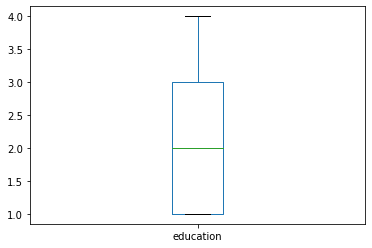

In [28]:
#aykırı veri analizi , aykırı veri var mı yok mu 
print('EDUCATİON GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['education'].plot(kind='box')
#görselde ki üst sınır 4.0e yakın olan çizgi min çizgi altta 1.0 a yakın olan çizgi medyan ise 2.0
#çizgilerin dışında değer görünmüyor yani education sutununda aykırı değer yok
Q1=verilerKalpKriziRiskiTenYears.education.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.education.quantile(0.75)
IQR=Q3-Q1
#print(Q1,Q3,IQR)
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_edu=Q3+1.5*IQR
alt_sinir_edu=Q1-1.5*IQR

verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['education']> ust_sinir_edu) | (verilerKalpKriziRiskiTenYears['education']< alt_sinir_edu)]

CİGSPERDAY GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  50.0
Bu değer altı aykırı veridir:  -30.0


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
42,42,39,1.000000,M,YES,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.00000,0
76,76,37,4.000000,M,YES,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.00000,0
482,482,49,2.000000,M,YES,60.0,0.0,0,0,0,213.0,123.0,75.0,24.84,70.0,82.08652,1
869,869,58,2.000000,M,YES,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.00000,0
1774,1774,46,1.000000,M,YES,60.0,0.0,0,0,0,285.0,121.0,82.0,27.62,70.0,79.00000,0
2075,2075,59,1.000000,M,YES,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.00000,0
2222,2222,48,1.970936,M,YES,60.0,0.0,0,0,0,232.0,136.0,81.0,25.83,80.0,78.00000,0
2985,2985,40,3.000000,M,YES,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.00000,0
3374,3374,67,2.000000,M,YES,60.0,0.0,0,1,0,261.0,170.0,100.0,22.71,72.0,79.00000,1


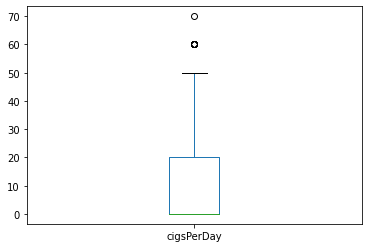

In [29]:

print('CİGSPERDAY GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['cigsPerDay'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.cigsPerDay.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.cigsPerDay.quantile(0.75)
IQR=Q3-Q1
#print(Q1,Q3,IQR)
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_cigsPerDay=Q3+1.5*IQR
alt_sinir_cigsPerDay=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['cigsPerDay']> ust_sinir_cigsPerDay) | (verilerKalpKriziRiskiTenYears['cigsPerDay']< alt_sinir_cigsPerDay)]
#bütün satırı getirdi


PREVALENTSTROKE GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  0.0
Bu değer altı aykırı veridir:  0.0


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
29,29,63,1.0,F,NO,0.0,0.000000,1,1,0,273.0,152.0,70.0,19.690000,80.0,79.00000,1
38,38,41,2.0,F,YES,9.0,1.000000,1,1,0,180.0,114.0,70.0,22.410000,92.0,82.08652,0
54,54,63,1.0,M,YES,20.0,0.000000,1,1,0,213.0,163.0,94.0,25.794964,76.0,69.00000,1
86,86,52,2.0,M,NO,0.0,0.000000,1,0,0,202.0,136.0,94.0,29.930000,83.0,67.00000,1
173,173,58,1.0,F,NO,0.0,0.000000,1,1,1,267.0,157.0,94.0,33.320000,92.0,205.00000,1
584,584,52,2.0,F,YES,5.0,0.000000,1,1,0,205.0,159.0,110.0,28.180000,75.0,83.00000,1
610,610,42,2.0,F,NO,0.0,0.000000,1,0,0,206.0,101.0,75.0,18.730000,55.0,84.00000,0
680,680,60,3.0,M,NO,0.0,0.000000,1,1,0,203.0,140.0,95.0,28.040000,60.0,83.00000,0
795,795,65,1.0,M,NO,0.0,0.000000,1,1,0,266.0,140.0,100.0,29.360000,80.0,77.00000,1
958,958,54,2.0,F,NO,0.0,0.000000,1,0,0,321.0,150.0,93.0,22.500000,75.0,131.00000,0


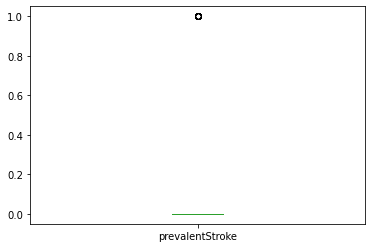

In [30]:
print('PREVALENTSTROKE GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['prevalentStroke'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.prevalentStroke.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.prevalentStroke.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_prevalentStroke=Q3+1.5*IQR
alt_sinir_prevalentStroke=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['prevalentStroke']> ust_sinir_prevalentStroke) | (verilerKalpKriziRiskiTenYears['prevalentStroke']< alt_sinir_prevalentStroke)]
#bütün satırı getirdi
#bütün satırı getirdi

BPMeds GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  0.0
Bu değer altı aykırı veridir:  0.0


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
8,8,41,2.000000,F,YES,20.0,0.029886,0,0,0,220.0,126.0,78.0,20.70,86.0,79.00000,0
38,38,41,2.000000,F,YES,9.0,1.000000,1,1,0,180.0,114.0,70.0,22.41,92.0,82.08652,0
102,102,68,2.000000,F,NO,0.0,0.029886,0,0,0,257.0,144.0,95.0,29.25,80.0,77.00000,0
104,104,57,1.970936,F,NO,0.0,1.000000,0,1,0,190.0,155.0,85.0,26.08,55.0,66.00000,0
128,128,67,2.000000,F,NO,0.0,0.029886,0,0,0,261.0,117.0,63.0,22.55,75.0,83.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,3250,60,2.000000,F,YES,20.0,1.000000,0,1,0,294.0,220.0,118.0,24.22,90.0,59.00000,0
3278,3278,49,2.000000,F,YES,30.0,1.000000,0,1,0,350.0,174.0,90.0,18.44,110.0,78.00000,0
3281,3281,55,1.000000,M,YES,3.0,0.029886,0,0,0,246.0,112.5,72.5,27.56,60.0,72.00000,0
3371,3371,55,2.000000,F,NO,0.0,1.000000,0,1,0,285.0,158.0,98.0,30.23,70.0,88.00000,0


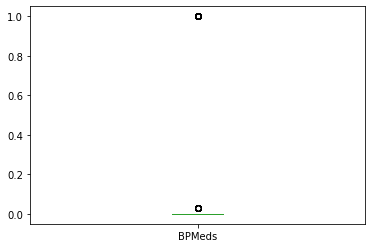

In [31]:
print('BPMeds GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['BPMeds'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.BPMeds.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.BPMeds.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_BPMeds=Q3+1.5*IQR
alt_sinir_BPMeds=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['BPMeds']> ust_sinir_BPMeds) | (verilerKalpKriziRiskiTenYears['BPMeds']< alt_sinir_BPMeds)]
#bütün satırı getirdi
#bütün satırı getirdi

totChol GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  351.0
Bu değer altı aykırı veridir:  119.0


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
112,112,57,1.000000,F,NO,0.000000,0.000000,0,1,0,382.0,133.0,77.0,24.270000,75.0,81.00000,0
194,194,56,1.000000,F,NO,0.000000,0.029886,0,1,0,391.0,126.0,84.0,24.830000,80.0,78.00000,0
220,220,47,2.000000,M,YES,18.000000,0.000000,0,1,0,439.0,145.0,74.0,22.420000,100.0,90.00000,1
423,423,52,2.000000,F,NO,0.000000,0.000000,0,1,1,600.0,159.5,94.0,28.270000,78.0,140.00000,1
491,491,61,1.000000,F,YES,9.069477,0.000000,0,1,0,356.0,168.0,98.0,27.300000,103.0,106.00000,0
512,512,51,1.970936,M,YES,9.000000,0.000000,0,1,0,696.0,157.0,87.0,24.440000,95.0,84.00000,0
659,659,63,1.000000,F,NO,0.000000,0.000000,0,1,0,361.0,167.0,100.0,27.310000,85.0,103.00000,1
661,661,57,4.000000,F,YES,9.000000,0.000000,0,0,0,382.0,140.0,94.0,21.200000,98.0,70.00000,0
733,733,42,3.000000,F,NO,0.000000,0.000000,0,0,0,464.0,128.0,87.0,22.900000,72.0,72.00000,1
912,912,60,1.000000,F,NO,0.000000,0.000000,0,0,0,391.0,114.0,64.0,24.570000,82.0,83.00000,0


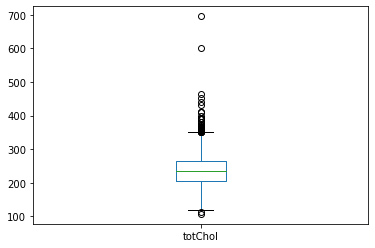

In [32]:
print('totChol GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['totChol'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.totChol.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.totChol.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_totChol=Q3+1.5*IQR
alt_sinir_totChol=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['totChol']> ust_sinir_totChol) | (verilerKalpKriziRiskiTenYears['totChol']< alt_sinir_totChol)]
#bütün satırı getirdi
#bütün satırı getirdi

diabetes GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  0.0
Bu değer altı aykırı veridir:  0.0


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,3164,43,1.0,M,YES,20.0,0.0,0,0,1,309.0,124.0,85.0,26.91,70.0,215.0,0
3212,3212,60,1.0,F,NO,0.0,0.0,0,1,1,282.0,213.0,94.5,28.58,71.0,78.0,0
3232,3232,50,1.0,F,NO,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
3260,3260,43,1.0,F,NO,0.0,0.0,0,1,1,231.0,155.5,99.5,34.95,68.0,274.0,1


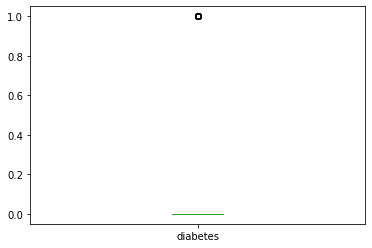

In [33]:
print('diabetes GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['diabetes'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.diabetes.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.diabetes.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_diabetes=Q3+1.5*IQR
alt_sinir_diabetes=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['diabetes']> ust_sinir_diabetes) | (verilerKalpKriziRiskiTenYears['diabetes']< alt_sinir_diabetes)]
#bütün satırı getirdi
#bütün satırı getirdi

prevalentHyp GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  2.5
Bu değer altı aykırı veridir:  -1.5


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


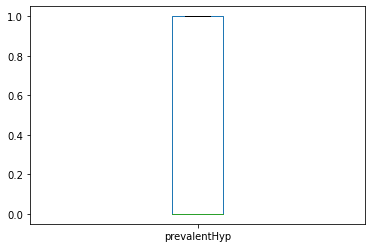

In [34]:
print('prevalentHyp GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['prevalentHyp'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.prevalentHyp.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.prevalentHyp.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_prevalentHyp=Q3+1.5*IQR
alt_sinir_prevalentHyp=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['prevalentHyp']> ust_sinir_prevalentHyp) | (verilerKalpKriziRiskiTenYears['prevalentHyp']< alt_sinir_prevalentHyp)]
#bütün satırı getirdi
#bütün satırı getirdi

sysBP GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  184.5
Bu değer altı aykırı veridir:  76.5


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.000000,232.0,136.0,24.83,75.0,79.00000,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,237.074284,185.0,121.0,35.22,80.0,82.08652,0
37,37,63,2.0,F,NO,0.0,0.0,0,1,0,293.000000,186.5,97.0,30.47,60.0,96.00000,0
71,71,63,1.0,M,NO,0.0,0.0,0,1,0,246.000000,193.0,104.0,23.08,80.0,73.00000,0
163,163,67,1.0,F,NO,0.0,1.0,0,1,0,251.000000,192.0,102.0,44.09,55.0,62.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,3291,66,3.0,M,NO,0.0,0.0,0,1,0,226.000000,213.0,133.0,25.29,100.0,67.00000,0
3293,3293,54,2.0,F,NO,0.0,0.0,0,1,0,302.000000,210.0,127.5,31.98,68.0,79.00000,0
3296,3296,57,1.0,F,YES,43.0,0.0,0,1,0,283.000000,207.5,118.0,38.61,100.0,83.00000,1
3308,3308,60,1.0,F,NO,0.0,0.0,0,1,0,352.000000,197.5,105.0,36.29,75.0,95.00000,1


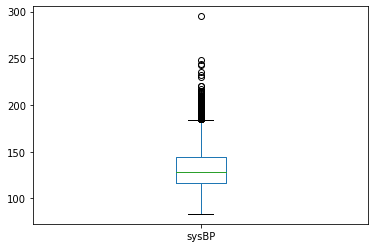

In [35]:
print('sysBP GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['sysBP'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.sysBP.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.sysBP.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_sysBP=Q3+1.5*IQR
alt_sinir_sysBP=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['sysBP']> ust_sinir_sysBP) | (verilerKalpKriziRiskiTenYears['sysBP']< alt_sinir_sysBP)]
#bütün satırı getirdi
#bütün satırı getirdi

BMI GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  35.44875
Bu değer altı aykırı veridir:  15.578750000000005


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,14,58,3.0,F,NO,0.0,0.0,0,1,0,188.0,160.0,120.0,35.58,88.0,85.0,0
20,20,42,1.0,F,YES,20.0,0.0,0,1,0,199.0,141.0,92.0,43.69,80.0,60.0,1
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
108,108,49,1.0,M,YES,20.0,0.0,0,0,0,288.0,128.0,89.0,35.96,73.0,75.0,0
119,119,64,1.0,F,NO,0.0,0.0,0,0,0,213.0,133.0,77.5,35.62,77.0,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,3232,50,1.0,F,NO,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
3236,3236,45,1.0,F,NO,0.0,0.0,0,1,0,183.0,151.0,101.0,45.80,80.0,63.0,0
3296,3296,57,1.0,F,YES,43.0,0.0,0,1,0,283.0,207.5,118.0,38.61,100.0,83.0,1
3308,3308,60,1.0,F,NO,0.0,0.0,0,1,0,352.0,197.5,105.0,36.29,75.0,95.0,1


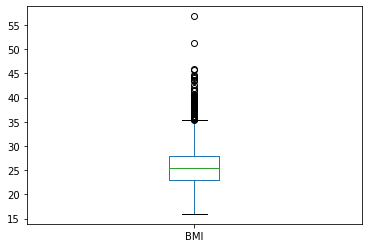

In [36]:
print('BMI GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['BMI'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.BMI.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.BMI.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_BMI=Q3+1.5*IQR
alt_sinir_BMI=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['BMI']> ust_sinir_BMI) | (verilerKalpKriziRiskiTenYears['BMI']< alt_sinir_BMI)]
#bütün satırı getirdi
#bütün satırı getirdi

diaBP GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  113.25
Bu değer altı aykırı veridir:  51.25


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
5,5,61,3.0,F,NO,0.000000,0.000000,0,1,0,272.000000,182.0,121.0,32.80,85.0,65.00000,1
6,6,61,1.0,M,NO,0.000000,0.000000,0,1,0,238.000000,232.0,136.0,24.83,75.0,79.00000,0
10,10,61,1.0,F,NO,0.000000,0.000000,0,1,0,237.074284,185.0,121.0,35.22,80.0,82.08652,0
14,14,58,3.0,F,NO,0.000000,0.000000,0,1,0,188.000000,160.0,120.0,35.58,88.0,85.00000,0
168,168,61,4.0,F,NO,0.000000,0.000000,0,1,0,235.000000,207.0,122.5,31.64,80.0,72.00000,0
171,171,65,1.0,F,NO,0.000000,0.000000,0,1,0,252.000000,179.5,114.0,30.47,90.0,87.00000,0
190,190,46,1.0,F,YES,7.000000,1.000000,0,1,0,280.000000,202.0,124.0,28.06,66.0,63.00000,1
324,324,59,2.0,F,NO,0.000000,1.000000,0,1,0,264.000000,244.0,124.0,19.61,76.0,120.00000,1
478,478,58,2.0,F,NO,0.000000,0.000000,0,1,0,166.000000,185.5,115.5,27.97,100.0,85.00000,0
684,684,56,2.0,M,YES,20.000000,0.000000,0,1,0,205.000000,210.0,130.0,25.49,95.0,127.00000,1


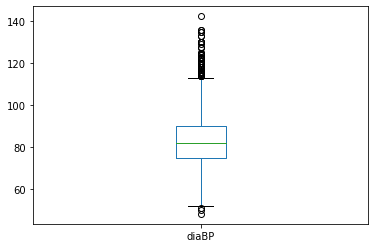

In [37]:
print('diaBP GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['diaBP'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.diaBP.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.diaBP.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_diaBP=Q3+1.5*IQR
alt_sinir_diaBP=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['diaBP']> ust_sinir_diaBP) | (verilerKalpKriziRiskiTenYears['diaBP']< alt_sinir_diaBP)]
#bütün satırı getirdi
#bütün satırı getirdi

heartRate GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  105.5
Bu değer altı aykırı veridir:  45.5


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
81,81,41,4.0,M,YES,40.0,0.0,0,0,0,254.0,141.0,100.0,27.68,110.0,82.08652,1
116,116,39,3.0,F,NO,0.0,0.0,0,0,0,213.0,125.0,87.0,16.73,110.0,75.00000,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.00000,0
138,138,53,3.0,F,NO,0.0,0.0,0,1,0,238.0,172.5,91.0,24.16,112.0,82.08652,0
278,278,46,1.0,F,NO,0.0,0.0,0,1,0,239.0,166.5,107.0,19.27,110.0,70.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3172,3172,53,1.0,M,YES,20.0,0.0,0,1,0,186.0,167.0,96.5,25.09,112.0,113.00000,0
3176,3176,57,3.0,F,YES,20.0,1.0,0,1,0,262.0,140.0,93.0,22.00,108.0,82.08652,1
3278,3278,49,2.0,F,YES,30.0,1.0,0,1,0,350.0,174.0,90.0,18.44,110.0,78.00000,0
3297,3297,46,1.0,F,YES,20.0,0.0,0,0,0,203.0,117.0,68.0,21.50,110.0,85.00000,0


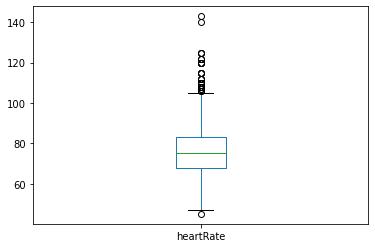

In [38]:
print('heartRate GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['heartRate'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.heartRate.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.heartRate.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_heartRate=Q3+1.5*IQR
alt_sinir_heartRate=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['heartRate']> ust_sinir_heartRate) | (verilerKalpKriziRiskiTenYears['heartRate']< alt_sinir_heartRate)]
#bütün satırı getirdi
#bütün satırı getirdi

glucose GRAFİĞİ ve AYKIRI VERİ LİSTESİ
Bu değer üstü aykırı veridir:  104.5
Bu değer altı aykırı veridir:  52.5


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
15,15,51,1.0,M,YES,15.0,0.0,0,0,0,212.0,146.0,89.0,24.49,100.0,132.0,1
59,59,60,3.0,F,NO,0.0,0.0,0,1,0,275.0,141.0,84.0,29.66,75.0,105.0,0
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
96,96,49,1.0,F,NO,0.0,0.0,0,1,0,265.0,150.0,77.5,21.83,96.0,107.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,3269,39,1.0,F,YES,15.0,0.0,0,0,0,255.0,142.0,85.5,24.89,100.0,108.0,0
3298,3298,46,2.0,F,NO,0.0,0.0,0,0,0,213.0,115.0,72.5,19.98,80.0,107.0,0
3316,3316,46,2.0,F,NO,0.0,0.0,0,0,0,304.0,131.5,78.5,21.02,68.0,112.0,0
3373,3373,58,1.0,F,NO,0.0,0.0,0,0,1,260.0,85.5,51.0,20.76,87.0,206.0,1


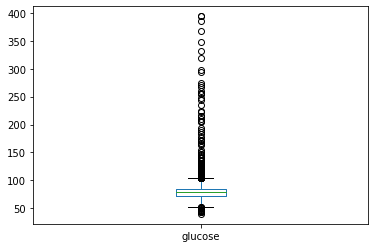

In [39]:
print('glucose GRAFİĞİ ve AYKIRI VERİ LİSTESİ')
verilerKalpKriziRiskiTenYears['glucose'].plot(kind='box')
Q1=verilerKalpKriziRiskiTenYears.glucose.quantile(0.25)
Q3=verilerKalpKriziRiskiTenYears.glucose.quantile(0.75)
IQR=Q3-Q1
print('Bu değer üstü aykırı veridir: ',Q3+1.5*IQR)
print('Bu değer altı aykırı veridir: ',Q1-1.5*IQR)
ust_sinir_glucose=Q3+1.5*IQR
alt_sinir_glucose=Q1-1.5*IQR
verilerKalpKriziRiskiTenYears[(verilerKalpKriziRiskiTenYears['glucose']> ust_sinir_glucose) | (verilerKalpKriziRiskiTenYears['glucose']< alt_sinir_glucose)]
#bütün satırı getirdi
#bütün satırı getirdi

In [40]:
#Aykırı verileri bulduk ve şimdi aykırı verileri alt sınıra ya da üst sınıra eşitleyelim


In [41]:
#education sutununda aykırı veri yoktu işlemi geçiyorum


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

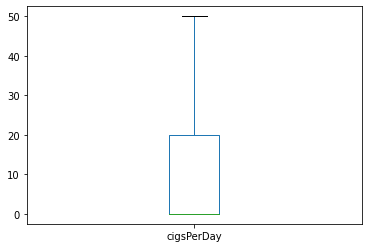

In [42]:
cigs_veri=verilerKalpKriziRiskiTenYears.cigsPerDay.copy()
cigs_veri[(cigs_veri> ust_sinir_cigsPerDay) | (cigs_veri< alt_sinir_cigsPerDay)]=ust_sinir_cigsPerDay

print('\n  aykırı veri eşitlendiği Grafiği')
cigs_veri.plot(kind='box')



  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

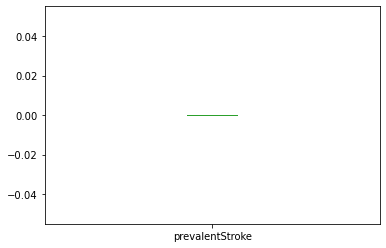

In [43]:
prevalentStroke_veri=verilerKalpKriziRiskiTenYears.prevalentStroke.copy()
prevalentStroke_veri[(prevalentStroke_veri> ust_sinir_prevalentStroke) | (prevalentStroke_veri< alt_sinir_prevalentStroke)]=ust_sinir_prevalentStroke
print('\n  aykırı veri eşitlendiği Grafiği')
prevalentStroke_veri.plot(kind='box')


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

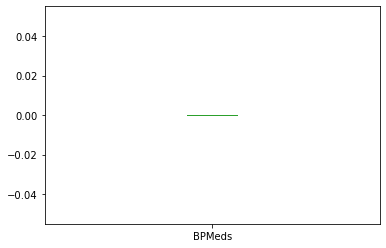

In [44]:
BPMeds_veri=verilerKalpKriziRiskiTenYears.BPMeds.copy()
BPMeds_veri[(BPMeds_veri> ust_sinir_BPMeds) | (BPMeds_veri< alt_sinir_BPMeds)]=ust_sinir_BPMeds
print('\n  aykırı veri eşitlendiği Grafiği')
BPMeds_veri.plot(kind='box')


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

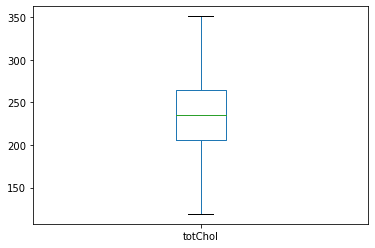

In [45]:
totChol_veri=verilerKalpKriziRiskiTenYears.totChol.copy()
totChol_veri[(totChol_veri> ust_sinir_totChol) | (totChol_veri< alt_sinir_totChol)]=ust_sinir_totChol

print('\n  aykırı veri eşitlendiği Grafiği')
totChol_veri.plot(kind='box')


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

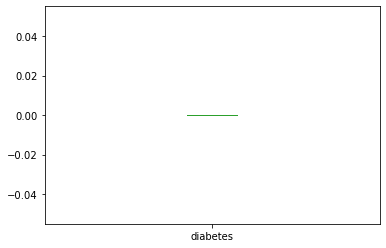

In [46]:
diabetes_veri=verilerKalpKriziRiskiTenYears.diabetes.copy()
diabetes_veri[(diabetes_veri> ust_sinir_diabetes) | (diabetes_veri< alt_sinir_diabetes)]=ust_sinir_diabetes
print('\n  aykırı veri eşitlendiği Grafiği')
diabetes_veri.plot(kind='box')


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

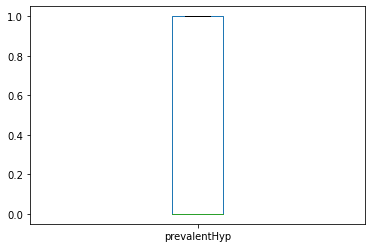

In [47]:
prevalentHyp_veri=verilerKalpKriziRiskiTenYears.prevalentHyp.copy()
prevalentHyp_veri[(prevalentHyp_veri> ust_sinir_prevalentHyp) | (prevalentHyp_veri< alt_sinir_prevalentHyp)]=ust_sinir_prevalentHyp
print('\n  aykırı veri eşitlendiği Grafiği')
prevalentHyp_veri.plot(kind='box')


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

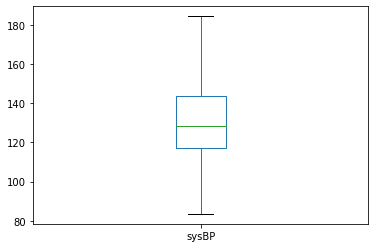

In [48]:
sysBP_veri=verilerKalpKriziRiskiTenYears.sysBP.copy()
sysBP_veri[(sysBP_veri> ust_sinir_sysBP) | (sysBP_veri< alt_sinir_sysBP)]=ust_sinir_sysBP

print('\n  aykırı veri eşitlendiği Grafiği')
sysBP_veri.plot(kind='box')


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

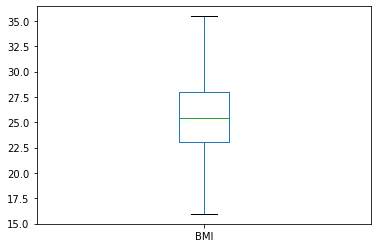

In [49]:
BMI_veri=verilerKalpKriziRiskiTenYears.BMI.copy()
BMI_veri[(BMI_veri> ust_sinir_BMI) | (BMI_veri< alt_sinir_BMI)]=ust_sinir_BMI
print('\n  aykırı veri eşitlendiği Grafiği')
BMI_veri.plot(kind='box')


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

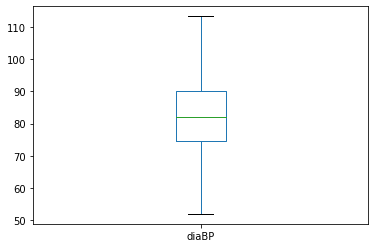

In [50]:
diaBP_veri=verilerKalpKriziRiskiTenYears.diaBP.copy()
diaBP_veri[(diaBP_veri> ust_sinir_diaBP) | (diaBP_veri< alt_sinir_diaBP)]=ust_sinir_diaBP
print('\n  aykırı veri eşitlendiği Grafiği')
diaBP_veri.plot(kind='box')


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

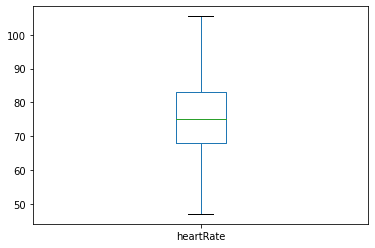

In [51]:
heartRate_veri=verilerKalpKriziRiskiTenYears.heartRate.copy()
heartRate_veri[(heartRate_veri> ust_sinir_heartRate) | (heartRate_veri< alt_sinir_heartRate)]=ust_sinir_heartRate
print('\n  aykırı veri eşitlendiği Grafiği')
heartRate_veri.plot(kind='box')


  aykırı veri eşitlendiği Grafiği


<AxesSubplot:>

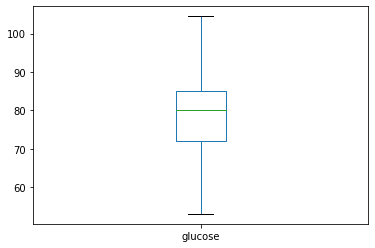

In [52]:
glucose_veri=verilerKalpKriziRiskiTenYears.glucose.copy()
glucose_veri[(glucose_veri> ust_sinir_glucose) | (glucose_veri< alt_sinir_glucose)]=ust_sinir_glucose
print('\n  aykırı veri eşitlendiği Grafiği')
glucose_veri.plot(kind='box')

In [53]:
#Kategorik veri yapma işlemi ,daha az bellek kullanmak için
verilerKalpKriziRiskiTenYears.dtypes
# veriTiplerini yazdırdıp tiplerine göre değiştireceğim obj olanları sayısallaştıracağım

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [54]:
verilerKalpKriziRiskiTenYears.columns.get_loc('sex')  # işlem yapacağım sutun indexi 

3

In [55]:
cinsiyet=verilerKalpKriziRiskiTenYears.iloc[:,3:4].values
cinsiyet

array([['F'],
       ['M'],
       ['F'],
       ...,
       ['M'],
       ['M'],
       ['F']], dtype=object)

In [56]:
from sklearn import preprocessing 
sex_kategori=preprocessing.LabelEncoder()
cinsiyet[:,0]=sex_kategori.fit_transform(verilerKalpKriziRiskiTenYears.iloc[:,3:4])
cinsiyet

C:\Users\svnc_\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=object)

In [57]:
verilerKalpKriziRiskiTenYears.columns.get_loc('is_smoking') # hangi sutun index i bulalım

4

In [58]:
sigara_icme_durumu=verilerKalpKriziRiskiTenYears.iloc[:,4:5].values
sigara_icme_durumu

array([['YES'],
       ['NO'],
       ['YES'],
       ...,
       ['YES'],
       ['NO'],
       ['NO']], dtype=object)

In [59]:
is_smoking_kategorize=preprocessing.LabelEncoder()
sigara_icme_durumu[:,0]=is_smoking_kategorize.fit_transform(verilerKalpKriziRiskiTenYears.iloc[:,4:5])
sigara_icme_durumu

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=object)

In [60]:
#KENDİ YAZDIĞIM ALGORİTMA İLE YAPALIM
cinsiyet=verilerKalpKriziRiskiTenYears.iloc[:,3:4].values
cinsiyet_satir=cinsiyet.shape[0]

In [61]:
#F olanlar 1 # m olanlar 0 yapacağız
for i in range (cinsiyet_satir):
    if cinsiyet[i]=='F':
        cinsiyet[i]=1
    if cinsiyet[i]=='M':
        cinsiyet[i]=0


In [62]:
cinsiyet

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=object)

In [63]:
#obj olan sigar içme durumunu da yapalım
sigara_icme_durumu=verilerKalpKriziRiskiTenYears.iloc[:,4:5].values
sigara_icme_durumu_satir=sigara_icme_durumu.shape[0]

In [64]:
#yes olanlar 1 no olanlar 0 yapalım
for i in range (sigara_icme_durumu_satir):
    if sigara_icme_durumu[i]=='YES':
        sigara_icme_durumu[i]=1
    if sigara_icme_durumu[i]=='NO':
        sigara_icme_durumu[i]=0


In [65]:
sigara_icme_durumu

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=object)

In [66]:
verilerKalpKriziRiskiTenYears.is_smoking=sigara_icme_durumu.copy() #burada kopyalayıp verileri kategorik yazdırdı
verilerKalpKriziRiskiTenYears.sex=cinsiyet.copy() 


In [67]:
#değişti mi diye kontroll edelim
verilerKalpKriziRiskiTenYears.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [68]:
normalizasyonVeri=verilerKalpKriziRiskiTenYears.drop(['id','TenYearCHD'], axis=1)
normalizasyonVeri

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2.0,1,1,3.0,0.000000,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0
1,36,4.0,0,0,0.0,0.000000,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0
2,46,1.0,1,1,10.0,0.000000,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0
3,50,1.0,0,1,20.0,0.000000,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0
4,64,1.0,1,1,30.0,0.000000,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,1,0,0.0,0.000000,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0
3386,46,1.0,1,0,0.0,0.000000,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0
3387,44,3.0,0,1,3.0,0.000000,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0
3388,60,1.0,0,0,0.0,0.029886,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0


In [69]:
satirSayi=normalizasyonVeri.shape[1]
sutunSayi=normalizasyonVeri.shape[0]


In [70]:
#Hazır Fonksiyon ile Normalizasyon ve Standardizasyon işlemi

In [71]:
from sklearn.preprocessing import MinMaxScaler
scalerNorm= MinMaxScaler() 
normalizasyon_scale = scalerNorm.fit_transform(normalizasyonVeri) 

In [72]:
normalizasyon_scale

array([[0.84210526, 0.33333333, 1.        , ..., 0.24081696, 0.45918367,
        0.11299435],
       [0.10526316, 1.        , 0.        , ..., 0.33814887, 0.2755102 ,
        0.09887006],
       [0.36842105, 0.        , 1.        , ..., 0.10749265, 0.43877551,
        0.15254237],
       ...,
       [0.31578947, 0.66666667, 0.        , ..., 0.31733595, 0.28571429,
        0.09039548],
       [0.73684211, 0.        , 0.        , ..., 0.17262488, 0.35714286,
        0.12711864],
       [0.57894737, 0.66666667, 1.        , ..., 0.34084231, 0.34693878,
        0.14689266]])

In [73]:
np_dizi_nrm=np.array(normalizasyon_scale)
boyutuDegisti_dizi_nrm=np.reshape(np_dizi_nrm,(sutunSayi,satirSayi))
listeDF_nrm=pd.DataFrame(boyutuDegisti_dizi_nrm)
listeDF_nrm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.842105,0.333333,1.0,1.0,0.042857,0.000000,0.0,0.0,0.0,0.193548,0.304965,0.391534,0.240817,0.459184,0.112994
1,0.105263,1.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.178268,0.399527,0.529101,0.338149,0.275510,0.098870
2,0.368421,0.000000,1.0,1.0,0.142857,0.000000,0.0,0.0,0.0,0.242784,0.153664,0.243386,0.107493,0.438776,0.152542
3,0.473684,0.000000,0.0,1.0,0.285714,0.000000,0.0,1.0,0.0,0.213922,0.352246,0.423280,0.301175,0.234694,0.152542
4,0.842105,0.000000,1.0,1.0,0.428571,0.000000,0.0,0.0,0.0,0.227504,0.250591,0.391534,0.256121,0.255102,0.104520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.736842,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.261460,0.189125,0.328042,0.326151,0.255102,0.177966
3386,0.368421,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.156197,0.087470,0.084656,0.146915,0.357143,0.124294
3387,0.315789,0.666667,0.0,1.0,0.042857,0.000000,0.0,1.0,0.0,0.415959,0.380615,0.751323,0.317336,0.285714,0.090395
3388,0.736842,0.000000,0.0,0.0,0.000000,0.029886,0.0,1.0,0.0,0.142615,0.394799,0.603175,0.172625,0.357143,0.127119


In [74]:
from sklearn.preprocessing import StandardScaler
standardizasyon_veri=verilerKalpKriziRiskiTenYears.drop(['id','TenYearCHD'], axis=1)
scaleStd=StandardScaler()
std_veri=scaleStd.fit_transform(standardizasyon_veri)

In [75]:
std_veri

array([[ 1.68278310e+00,  2.88978465e-02,  8.73424590e-01, ...,
        -8.65179002e-15,  1.17165160e+00, -9.02146349e-02],
       [-1.57621005e+00,  2.01743091e+00, -1.14491853e+00, ...,
         9.68025457e-01, -3.32316814e-01, -3.06399107e-01],
       [-4.12283921e-01, -9.65368684e-01,  8.73424590e-01, ...,
        -1.32599172e+00,  1.00454400e+00,  5.15101887e-01],
       ...,
       [-6.45069146e-01,  1.02316438e+00, -1.14491853e+00, ...,
         7.61028154e-01, -2.48763013e-01, -4.36109790e-01],
       [ 1.21721265e+00, -9.65368684e-01, -1.14491853e+00, ...,
        -6.78211920e-01,  3.36113594e-01,  1.25969837e-01],
       [ 5.18856979e-01,  1.02316438e+00,  8.73424590e-01, ...,
         9.94813344e-01,  2.52559793e-01,  4.28628098e-01]])

In [76]:
np_dizi_std=np.array(std_veri)
boyutuDegisti_dizi_std=np.reshape(np_dizi_std,(sutunSayi,satirSayi))
listeDF_std=pd.DataFrame(boyutuDegisti_dizi_std)
listeDF_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.682783,0.028898,0.873425,1.004731,-0.512681,-0.17667,-0.080821,-0.678658,-0.162295,-0.357314,0.690879,0.176093,-8.651790e-15,1.171652,-0.090215
1,-1.576210,2.017431,-1.144919,-0.995291,-0.766087,-0.17667,-0.080821,1.473495,-0.162295,-0.557375,1.588193,1.257462,9.680255e-01,-0.332317,-0.306399
2,-0.412284,-0.965369,0.873425,1.004731,0.078600,-0.17667,-0.080821,-0.678658,-0.162295,0.287325,-0.744824,-0.988457,-1.325992e+00,1.004544,0.515102
3,0.053287,-0.965369,-1.144919,1.004731,0.923287,-0.17667,-0.080821,1.473495,-0.162295,-0.090567,1.139536,0.425640,6.003008e-01,-0.666532,0.515102
4,1.682783,-0.965369,0.873425,1.004731,1.767973,-0.17667,-0.080821,-0.678658,-0.162295,0.087264,0.174923,0.176093,1.522126e-01,-0.499424,-0.219925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.217213,-0.965369,0.873425,-0.995291,-0.766087,-0.17667,-0.080821,-0.678658,-0.162295,0.531843,-0.408331,-0.323000,8.486976e-01,-0.499424,0.904234
3386,-0.412284,-0.965369,0.873425,-0.995291,-0.766087,-0.17667,-0.080821,-0.678658,-0.162295,-0.846351,-1.372943,-2.236189,-9.339145e-01,0.336114,0.082733
3387,-0.645069,1.023164,-1.144919,1.004731,-0.512681,-0.17667,-0.080821,1.473495,-0.162295,2.554677,1.408730,3.004287,7.610282e-01,-0.248763,-0.436110
3388,1.217213,-0.965369,-1.144919,-0.995291,-0.766087,0.00000,-0.080821,1.473495,-0.162295,-1.024182,1.543327,1.839737,-6.782119e-01,0.336114,0.125970


In [77]:
#Kendi yazdığım fonk ile normalizasyon işlemi
#her sutunun max ve min bul 
#her sutunun ort bul ve işlemi her satır için incele

In [78]:
normalizasyonVeri_Fonksiyon=verilerKalpKriziRiskiTenYears.drop(['id','TenYearCHD'], axis=1)


In [79]:
# sutunların ortalama min ve max ları listede tuttum

minListe=[]
maxListe=[]
ortListe=[]
ortalama=0.0
toplam=0.0
for i in range(satirSayi):
    en_kucuk_sayi=normalizasyonVeri_Fonksiyon.iloc[i,0]
    en_buyuk_sayi=normalizasyonVeri_Fonksiyon.iloc[i,0]
    for j in range(sutunSayi):
        veri=normalizasyonVeri_Fonksiyon.iloc[j,i]
        if en_kucuk_sayi>veri:
            en_kucuk_sayi=veri
        if en_buyuk_sayi<veri:
            en_buyuk_sayi=veri
        toplam=toplam+veri
    ortalama=toplam/sutunSayi
        
    ortListe.append(ortalama)
    minListe.append(en_kucuk_sayi)
    maxListe.append(en_buyuk_sayi)
    
    toplam=0.0
    ortalama=0.0

In [80]:
normalizasyonListe=[]
for i in range(satirSayi):
    
    for j in range(sutunSayi):
        veri=normalizasyonVeri_Fonksiyon.iloc[j,i]
        normalizasyon=((veri-minListe[i])/(maxListe[i]-minListe[i]))
        normalizasyonListe.append(normalizasyon)
      
        
        
    
    

In [81]:
np_dizi_nrm=np.array(normalizasyonListe)
boyutuDegisti_dizi_nrm=np.reshape(np_dizi_nrm,(sutunSayi,satirSayi))
listeDF_nrm=pd.DataFrame(boyutuDegisti_dizi_nrm)
listeDF_nrm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.842105,0.105263,0.368421,0.473684,0.842105,0.763158,0.763158,0.105263,0.236842,0.605263,0.763158,0.552632,0.289474,0.315789,0.684211
1,0.500000,0.473684,0.315789,0.631579,0.263158,0.263158,0.157895,0.157895,0.815789,0.078947,0.315789,0.105263,0.578947,0.236842,0.815789
2,0.500000,0.605263,0.500000,0.157895,0.789474,0.394737,0.368421,0.815789,0.236842,0.289474,0.052632,0.500000,0.184211,0.368421,0.500000
3,0.842105,0.605263,0.710526,0.605263,0.368421,0.789474,0.631579,0.342105,0.315789,0.815789,0.500000,0.447368,0.605263,0.368421,0.736842
4,0.157895,0.210526,0.526316,0.421053,0.789474,0.131579,0.736842,0.736842,0.763158,0.868421,0.473684,0.815789,0.263158,0.684211,0.105263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.084746,0.203390,0.107345,0.090395,0.076271,0.050847,0.124294,0.084746,0.079096,0.118644,0.090395,0.121469,0.146893,0.161017,0.132768
3386,0.161017,0.067797,0.141243,0.107345,0.135593,0.121469,0.098870,0.093220,0.087571,0.107345,0.112994,0.101695,0.062147,0.090395,0.155367
3387,0.169492,0.101695,0.115819,0.096045,0.118888,0.135593,0.096045,0.127119,0.121469,0.141243,0.112994,0.107345,0.104520,0.098870,0.135593
3388,0.107345,0.098870,0.132768,0.107345,0.121469,0.096045,0.064972,0.081921,0.084746,0.104520,0.118888,0.135593,0.112994,0.468927,0.110169


In [82]:
#KORELASYON
# değişkenler bizim TenYearsCHD yi ne kadar etkiliyor bunu analiz edeceğiz. 
verilerKalpKriziRiskiTenYears.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030236,-0.017192,0.007034,-0.038873,0.013236,0.003690,-0.019782,0.019676,0.000832,0.039750,0.024683,0.014876,0.009866
age,0.016759,1.000000,-0.170243,-0.191956,0.123262,0.059038,0.308826,0.107875,0.272209,0.404845,0.221896,0.137645,-0.002595,0.111241,0.224927
education,-0.030236,-0.170243,1.000000,0.010945,-0.019474,-0.034191,-0.083753,-0.051115,-0.020170,-0.135743,-0.060218,-0.131656,-0.046489,-0.036360,-0.052074
cigsPerDay,-0.017192,-0.191956,0.010945,1.000000,-0.036823,-0.042056,-0.079093,-0.049012,-0.024425,-0.100545,-0.068551,-0.100712,0.066514,-0.065553,0.066686
BPMeds,0.007034,0.123262,-0.019474,-0.036823,1.000000,0.116670,0.257518,0.070904,0.081381,0.261210,0.199135,0.087301,0.018041,0.061365,0.087420
prevalentStroke,-0.038873,0.059038,-0.034191,-0.042056,0.116670,1.000000,0.071652,0.010115,-0.010831,0.057568,0.047235,0.017741,-0.019184,0.023061,0.068627
prevalentHyp,0.013236,0.308826,-0.083753,-0.079093,0.257518,0.071652,1.000000,0.082565,0.158741,0.699285,0.612897,0.299723,0.150766,0.082747,0.166544
diabetes,0.003690,0.107875,-0.051115,-0.049012,0.070904,0.010115,0.082565,1.000000,0.059072,0.124011,0.061165,0.088104,0.039742,0.608937,0.103681
totChol,-0.019782,0.272209,-0.020170,-0.024425,0.081381,-0.010831,0.158741,0.059072,1.000000,0.197933,0.153826,0.113420,0.087077,0.060291,0.093679
sysBP,0.019676,0.404845,-0.135743,-0.100545,0.261210,0.057568,0.699285,0.124011,0.197933,1.000000,0.781908,0.331947,0.178178,0.137020,0.212703


<AxesSubplot:>

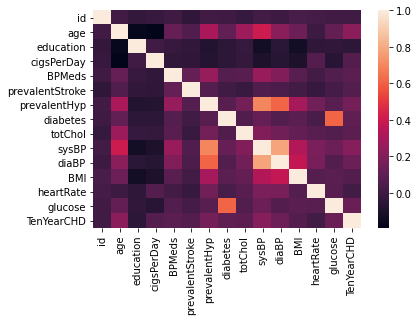

In [83]:
corelasyon= verilerKalpKriziRiskiTenYears.corr()
sns.heatmap(corelasyon)

In [84]:
ageCorr=verilerKalpKriziRiskiTenYears['age'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
ageCorr


0.22492693530228577

In [85]:
educationCorr=verilerKalpKriziRiskiTenYears['education'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
educationCorr


-0.05207415911967883

In [86]:
cigsPerDayCorr=verilerKalpKriziRiskiTenYears['cigsPerDay'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
# tek tek butun hepsinin kalpkrizi riski
#ile ilişkisini inceleyip büyükten kücüğe değerleri sıralayıp riskte en etkili faktörü bulacağım.
cigsPerDayCorr


0.06668577978040753

In [87]:
BPMedsCorr=verilerKalpKriziRiskiTenYears['BPMeds'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
BPMedsCorr


0.0874204141737587

In [88]:
prevalentStrokeCorr=verilerKalpKriziRiskiTenYears['prevalentStroke'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
prevalentStrokeCorr


0.06862666718348899

In [89]:
prevalentHypCorr=verilerKalpKriziRiskiTenYears['prevalentHyp'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
prevalentHypCorr


0.16654445825296052

In [90]:
diabetesCorr=verilerKalpKriziRiskiTenYears['diabetes'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
diabetesCorr


0.10368082846743074

In [91]:
totCholCorr=verilerKalpKriziRiskiTenYears['totChol'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
totCholCorr


0.09367872556428594

In [92]:
sysBPCorr=verilerKalpKriziRiskiTenYears['sysBP'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
sysBPCorr


0.21270292021881596

In [93]:
diaBPCorr=verilerKalpKriziRiskiTenYears['diaBP'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
diaBPCorr


0.13597864735577775

In [94]:
heartRateCorr=verilerKalpKriziRiskiTenYears['heartRate'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
heartRateCorr


0.02022425224289279

In [95]:
glucoseCorr=verilerKalpKriziRiskiTenYears['glucose'].corr(verilerKalpKriziRiskiTenYears['TenYearCHD'])
glucoseCorr

0.13264835405552988

In [96]:
dictCorr = dict(ageCorrDeger=ageCorr, educationCorrDeger=educationCorr, cigsPerDayCorrDeger=cigsPerDayCorr,BPMedsCorrDeger=BPMedsCorr
               ,prevalentStrokeCorrDeger=prevalentStrokeCorr,prevalentHypCorrDeger=prevalentHypCorr,diabetesCorrDeger=diabetesCorr,
               totCholCorrDeger=totCholCorr,sysBPCorrDeger=sysBPCorr,diaBPCorrDeger=diaBPCorr,heartRateCorrDeger=heartRateCorr,
               glucoseCorrDeger=glucoseCorr)
print('Sözlük ',dictCorr, '\n')


Sözlük  {'ageCorrDeger': 0.22492693530228577, 'educationCorrDeger': -0.05207415911967883, 'cigsPerDayCorrDeger': 0.06668577978040753, 'BPMedsCorrDeger': 0.0874204141737587, 'prevalentStrokeCorrDeger': 0.06862666718348899, 'prevalentHypCorrDeger': 0.16654445825296052, 'diabetesCorrDeger': 0.10368082846743074, 'totCholCorrDeger': 0.09367872556428594, 'sysBPCorrDeger': 0.21270292021881596, 'diaBPCorrDeger': 0.13597864735577775, 'heartRateCorrDeger': 0.02022425224289279, 'glucoseCorrDeger': 0.13264835405552988} 



In [97]:
print('Sıralanmış ilişki değerleri  küçükten büyüğe doğru verilmiştir ')
dictCorr_siralanmis = {k: v for k, v in sorted(dictCorr.items(), key=lambda x: x[1])}
print(dictCorr_siralanmis)

Sıralanmış ilişki değerleri  küçükten büyüğe doğru verilmiştir 
{'educationCorrDeger': -0.05207415911967883, 'heartRateCorrDeger': 0.02022425224289279, 'cigsPerDayCorrDeger': 0.06668577978040753, 'prevalentStrokeCorrDeger': 0.06862666718348899, 'BPMedsCorrDeger': 0.0874204141737587, 'totCholCorrDeger': 0.09367872556428594, 'diabetesCorrDeger': 0.10368082846743074, 'glucoseCorrDeger': 0.13264835405552988, 'diaBPCorrDeger': 0.13597864735577775, 'prevalentHypCorrDeger': 0.16654445825296052, 'sysBPCorrDeger': 0.21270292021881596, 'ageCorrDeger': 0.22492693530228577}


In [98]:
#en ayırt edici 5 özelliği kullanacağız
#ageCoor
#sysBPCorr
#prevalentHypCorr
#diaBPCorr
#glucoseCorr
#şimdi sınıflandırma işlemi yapacağız. 5 algoritma kullanılacak !!!!!

In [99]:
test_edilecek_veri=pd.read_csv('test.csv')
test_edilecek_veri.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [100]:
test_edilecek_veri.isnull()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
846,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [101]:
test_edilecek_veri.isnull().sum()

id                  0
age                 0
education          18
sex                 0
is_smoking          0
cigsPerDay          7
BPMeds              9
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 5
heartRate           0
glucose            84
dtype: int64

In [102]:
from sklearn.impute import SimpleImputer

In [103]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='mean')

In [104]:
test_edilecek_veri['education']=imputer.fit_transform(test_edilecek_veri['education'].values.reshape(-1,1))
test_edilecek_veri['cigsPerDay']=imputer.fit_transform(test_edilecek_veri['cigsPerDay'].values.reshape(-1,1))
test_edilecek_veri['BPMeds']=imputer.fit_transform(test_edilecek_veri['BPMeds'].values.reshape(-1,1))
test_edilecek_veri['totChol']=imputer.fit_transform(test_edilecek_veri['totChol'].values.reshape(-1,1))
test_edilecek_veri['BMI']=imputer.fit_transform(test_edilecek_veri['BMI'].values.reshape(-1,1))
test_edilecek_veri['glucose']=imputer.fit_transform(test_edilecek_veri['glucose'].values.reshape(-1,1))



In [105]:
test_edilecek_veri.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [164]:
test_edilecek_veri.columns.get_loc('is_smoking') # hangi sutun index i bulalım


4

In [165]:
sigara_icme_durumu_test=test_edilecek_veri.iloc[:,4:5].values
sigara_icme_durumu_test


array([['YES'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'

In [178]:
is_smoking_kategorize_test=preprocessing.LabelEncoder()


In [179]:
sigara_icme_durumu_test[:,0]=is_smoking_kategorize_test.fit_transform(test_edilecek_veri.iloc[:,4:5])
sigara_icme_durumu_test

C:\Users\svnc_\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [180]:
test_edilecek_veri.columns.get_loc('sex')  # işlem yapacağım sutun indexi 
cinsiyet_test=test_edilecek_veri.iloc[:,3:4].values
cinsiyet_test


array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [181]:
from sklearn import preprocessing 
sex_kategori_test=preprocessing.LabelEncoder()
cinsiyet_test[:,0]=sex_kategori_test.fit_transform(test_edilecek_veri.iloc[:,3:4])
cinsiyet_test

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [182]:
test_edilecek_veri.is_smoking=sigara_icme_durumu_test.copy() #burada kopyalayıp verileri kategorik yazdırdı
test_edilecek_veri.sex=cinsiyet_test.copy() 

In [183]:
frames = [verilerKalpKriziRiskiTenYears,test_edilecek_veri]  
result = pd.concat(frames)


In [184]:
#result=result.drop(columns=['id','sex','is_smoking'], axis='columns')

In [185]:
result.shape

(4238, 17)

In [186]:
result.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
843,4233,46,3.000000,0,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.000000,NaN
844,4234,58,2.000000,0,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.000000,NaN
845,4235,55,1.000000,1,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,81.482984,NaN
846,4236,45,3.000000,0,0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.000000,NaN
847,4237,56,2.010843,1,1,25.0,0.0,0,0,0,255.0,138.0,80.0,23.44,67.0,79.000000,NaN


In [187]:
#1Algoritma   Sınıflandırma 
from sklearn.model_selection import train_test_split
#en ayırt edici 5 özelliği kullanacağız
#ageCoor
#sysBPCorr
#prevalentHypCorr
#diaBPCorr
#glucoseCorr
#şimdi sınıflandırma işlemi yapacağız. 5 algoritma kullanılacak !!!!!

In [188]:
#verileri eğitmeye başlayalım
X=result.drop(columns=['TenYearCHD'], axis=1)
y=result['TenYearCHD']

In [189]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=0, shuffle=False)

In [190]:
X_train.shape

(3390, 16)

In [191]:
X_test.shape

(848, 16)

In [192]:
y_train.shape

(3390,)

In [193]:
y_test.shape

(848,)

In [194]:
#Linear Regresyon Modeli

In [195]:
from sklearn.linear_model import LinearRegression


In [196]:
linear_regresyon_model=LinearRegression()
linear_regresyon_model.fit(X_train,y_train)
linear_regresyon_tahmin=linear_regresyon_model.predict(X_test)
linear_regresyon_DataFrame=pd.DataFrame(linear_regresyon_tahmin)
linear_regresyon_DataFrame


,0
0,0.163002
1,0.120903
2,0.376578
3,0.071489
4,0.006512
...,...
843,0.107004
844,0.203783
845,0.118308
846,0.180846


In [197]:
#scor bul
X_Control=verilerKalpKriziRiskiTenYears.drop(columns=['TenYearCHD'], axis=1)
y_Control=verilerKalpKriziRiskiTenYears['TenYearCHD']


In [198]:
X_train_linear_regresyon,X_test_linear_regresyon,y_train_linear_regresyon,y_test_linear_regresyon=train_test_split(X_Control,y_Control, test_size=0.20, random_state=0, shuffle=False)

In [199]:
linear_regresyon_model_control=LinearRegression()
linear_regresyon_model_control.fit(X_train_linear_regresyon,y_train_linear_regresyon)
linear_regresyon_tahmin_control=linear_regresyon_model_control.predict(X_test_linear_regresyon)
linear_regresyon_DataFrame_control=pd.DataFrame(linear_regresyon_tahmin_control)
linear_regresyon_DataFrame_control


,0
0,-0.024578
1,0.202301
2,0.155810
3,0.147558
4,0.014382
...,...
673,0.170843
674,0.030706
675,0.166988
676,0.296167


In [200]:
print('İntercept', linear_regresyon_model_control.intercept_)
print('Coef', linear_regresyon_model_control.coef_)

İntercept -0.5277187841311447
Coef [ 5.39697004e-07  6.55914538e-03 -1.91796975e-03 -5.52961593e-02
  1.44153315e-02  2.15188340e-03  6.80560111e-02  2.68445382e-01
  7.26716083e-03  2.42738868e-02  1.24913092e-04  2.73392313e-03
 -1.36795440e-03 -2.04761620e-03  4.11378906e-05  1.50777952e-03]


In [201]:
df_p=pd.DataFrame({'Gerçek:':y_test_linear_regresyon ,'tahmin': linear_regresyon_tahmin_control})
df_p

,Gerçek:,tahmin
2712,0,-0.024578
2713,1,0.202301
2714,0,0.155810
2715,0,0.147558
2716,0,0.014382
...,...,...
3385,0,0.170843
3386,0,0.030706
3387,1,0.166988
3388,0,0.296167


In [206]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [317]:
mean_error_linear_regresyon=mean_squared_error(y_test_linear_regresyon,linear_regresyon_tahmin_control)
r2_linear_regresyon=r2_score(y_test_linear_regresyon,linear_regresyon_tahmin_control)
print('Mean error', mean_error_linear_regresyon)
print('r2', r2_linear_regresyon)



Mean error 0.12212741603553762
r2 0.08804387405977798


In [223]:
#Karar Ağacı

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [225]:
karar_agaci_model=DecisionTreeClassifier()
karar_agaci_model.fit(X_train,y_train)
karar_agaci_tahmin=karar_agaci_model.predict(X_test)
karar_agaci_DataFrame=pd.DataFrame(karar_agaci_tahmin)
karar_agaci_DataFrame

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
843,1.0
844,0.0
845,0.0
846,1.0


In [226]:
#Conf matris vs bulmak için elimizde çıktı değerleri olanı bölüp oranlarını bulacağım

In [227]:
#scor bul
X_Control=verilerKalpKriziRiskiTenYears.drop(columns=['TenYearCHD'], axis=1)
y_Control=verilerKalpKriziRiskiTenYears['TenYearCHD']


In [228]:
X_train_karar_agaci,X_test_karar_agaci,y_train_karar_agaci,y_test_karar_agaci=train_test_split(X_Control,y_Control, test_size=0.20, random_state=0, shuffle=False)

In [229]:
karar_agaci_model_control=DecisionTreeClassifier()
karar_agaci_model_control.fit(X_train_karar_agaci,y_train_karar_agaci)
karar_agaci_tahmin_control=karar_agaci_model_control.predict(X_test_karar_agaci)
karar_agaci_DataFrame_control=pd.DataFrame(karar_agaci_tahmin_control)
karar_agaci_DataFrame_control

,0
0,0
1,1
2,1
3,0
4,0
...,...
673,0
674,0
675,0
676,1


In [326]:
confusion_matrix_karar_agaci=confusion_matrix(y_test_karar_agaci,karar_agaci_tahmin_control)
print('Conf matris',confusion_matrix_karar_agaci)
accuracy_score_karar_agaci=accuracy_score(y_test_karar_agaci,karar_agaci_tahmin_control)
print('Acc score' ,accuracy_score_karar_agaci)
score_karar_agaci=karar_agaci_model_control.score(X_test_karar_agaci,y_test_karar_agaci)
print('Score', score_karar_agaci)
mean_error_karar_agaci=mean_squared_error(y_test_karar_agaci,karar_agaci_tahmin_control)
print('Mean error', mean_error_karar_agaci)
r2_karar_agaci=r2_score(y_test_karar_agaci,karar_agaci_tahmin_control)
print('R2 score', r2_karar_agaci)

Conf matris [[462 108]
 [ 76  32]]
Acc score 0.7286135693215339
Score 0.7286135693215339
Mean error 0.2713864306784661
R2 score -1.026510721247563


In [ ]:
#Logistic model    

In [233]:
from sklearn.linear_model import LogisticRegression #lojistik regresyon 
from sklearn.metrics import  confusion_matrix,  f1_score, recall_score

In [235]:
logistic_regresyon_model=LogisticRegression(max_iter=10000)
logistic_regresyon_model.fit(X_train,y_train)
logistic_regresyon_tahmin=logistic_regresyon_model.predict(X_test)
logistic_regresyon_DataFrame=pd.DataFrame(logistic_regresyon_tahmin)
logistic_regresyon_DataFrame



,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
843,0.0
844,0.0
845,0.0
846,0.0


In [237]:
#scor bul
X_Logistic_Regresyon=verilerKalpKriziRiskiTenYears.drop(columns=['TenYearCHD'], axis=1)
y_Logistic_Regresyon=verilerKalpKriziRiskiTenYears['TenYearCHD']
X_train_Logistic_Regresyon,X_test_Logistic_Regresyon,y_train_Logistic_Regresyon,y_test_Logistic_Regresyon=train_test_split(X_Logistic_Regresyon,y_Logistic_Regresyon, test_size=0.2)
logistic_regresyon_model.fit(X_train_Logistic_Regresyon,y_train_Logistic_Regresyon)
logistic_regresyon_tahmin_control=logistic_regresyon_model.predict(X_test_Logistic_Regresyon)
logistic_regresyon_DataFrame_control = pd.DataFrame({'Gerçek Değer':y_test_Logistic_Regresyon, 'Tahmin Değeri':logistic_regresyon_tahmin_control})
logistic_regresyon_DataFrame_control


,Gerçek Değer,Tahmin Değeri
2953,0,0
458,0,0
705,0,0
2774,0,0
569,0,0
...,...,...
2235,0,0
2797,0,0
1516,0,0
1705,0,0


In [328]:
confusion_matrix_logistic_regresyon=confusion_matrix(y_test_Logistic_Regresyon,logistic_regresyon_tahmin_control)
print('Conf matris',confusion_matrix_logistic_regresyon)
accuracy_score_logistic_regresyon=accuracy_score(y_test_Logistic_Regresyon,logistic_regresyon_tahmin_control)
print('Acc score' ,accuracy_score_logistic_regresyon)
score_logistic_regresyon=karar_agaci_model_control.score(X_test_Logistic_Regresyon,y_test_Logistic_Regresyon)
print('Score', score_logistic_regresyon)
mean_error_logistic_regresyon=mean_squared_error(y_test_Logistic_Regresyon,logistic_regresyon_tahmin_control)
print('Mean error', mean_error_logistic_regresyon)
r2_logistic_regresyon=r2_score(y_test_Logistic_Regresyon,logistic_regresyon_tahmin_control)
print('r2 score', r2_logistic_regresyon)

Conf matris [[593   3]
 [ 76   6]]
Acc score 0.883480825958702
Score 0.9498525073746312
Mean error 0.11651917404129794
r2 score -0.09596496971681123


In [253]:
#Model Svm 
from sklearn.svm import SVC
svm_Model=DecisionTreeClassifier()
svm_Model.fit(X_train,y_train)
svm_Tahmin=svm_Model.predict(X_test)
svm_DataFrame=pd.DataFrame({'Tahminler': svm_Tahmin})
svm_DataFrame



,Tahminler
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
843,1.0
844,0.0
845,0.0
846,1.0


In [264]:
X_SVM_control=verilerKalpKriziRiskiTenYears.drop(columns=['TenYearCHD'], axis=1)
y_SVM_control=verilerKalpKriziRiskiTenYears['TenYearCHD']


In [268]:
X_train_SVM,X_test_SVM,y_train_SVM,y_test_SVM=train_test_split(X_SVM_control,y_SVM_control, test_size=0.2)
svm_Model_control=SVC()
svm_Model_control.fit(X_train_SVM,y_train_SVM)
SVM_tahmin_control=svm_Model_control.predict(X_test_SVM)
dfSVM= pd.DataFrame({'Gerçek Değer':y_test_SVM, 'Tahmin Değeri':SVM_tahmin_control})
dfSVM



,Gerçek Değer,Tahmin Değeri
3070,1,0
746,0,0
2669,0,0
2568,0,0
990,0,0
...,...,...
2139,0,0
801,0,0
1004,0,0
3348,1,0


In [270]:
confusion_matrix_SVM=confusion_matrix(y_test_SVM,SVM_tahmin_control)
r2_score_SVM=r2_score(y_test_SVM,SVM_tahmin_control)
mean_error_SVM=mean_squared_error(y_test_SVM,SVM_tahmin_control)
accuarry_SVM= accuracy_score(y_test_SVM,SVM_tahmin_control)
print('Conf matris',confusion_matrix_SVM)
print('R2 skoru:', r2_score_SVM)
print('Ortalama kare hatası', mean_error_SVM)
print('Kesinlik değeri', accuarry_SVM)

Conf matris [[573   0]
 [105   0]]
R2 skoru: -0.18324607329842935
Ortalama kare hatası 0.15486725663716813
Kesinlik değeri 0.8451327433628318


In [271]:
#Model Neighborn

In [272]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score


In [273]:
KNeighborsClassifierModel=KNeighborsClassifier(n_neighbors=5)
KNeighborsClassifierModel
KNeighborsClassifierModel.fit(X_train,y_train)
KN_tahmin=KNeighborsClassifierModel.predict(X_test)
KN_DataFrame=pd.DataFrame(KN_tahmin)
KN_DataFrame

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
843,0.0
844,0.0
845,0.0
846,0.0


In [276]:
X_KN=verilerKalpKriziRiskiTenYears.drop(columns=['TenYearCHD'], axis=1)
y_KN=verilerKalpKriziRiskiTenYears['TenYearCHD']
X_train_KN,X_test_KN,y_train_KN,y_test_KN=train_test_split(X_KN,y_KN, test_size=0.20, random_state=0, shuffle=False)
KNeighborsClassifierModel.fit(X_train_KN,y_train_KN)
KN_tahmin_control=KNeighborsClassifierModel.predict(X_test_KN)
KN_DataFrame_control = pd.DataFrame({'Gerçek Değer':y_test_KN, 'Tahmin Değeri':KN_tahmin_control})
KN_DataFrame_control

,Gerçek Değer,Tahmin Değeri
2712,0,0
2713,1,0
2714,0,0
2715,0,0
2716,0,0
...,...,...
3385,0,0
3386,0,0
3387,1,0
3388,0,0


In [279]:
confusion_matrix_KN=confusion_matrix(y_test_KN,KN_tahmin_control)
r2_score_KN=r2_score(y_test_KN,KN_tahmin_control)
mean_error_KN=mean_squared_error(y_test_KN,KN_tahmin_control)
accuarry_KN= accuracy_score(y_test_KN,KN_tahmin_control)
print('Conf matris', confusion_matrix_KN)
print('R2 skoru:', r2_score_KN)
print('Ortalama kare hatası', mean_error_KN)
print('Kesinlik değeri',accuarry_KN)


Conf matris [[570   0]
 [108   0]]
R2 skoru: -0.18947368421052624
Ortalama kare hatası 0.1592920353982301
Kesinlik değeri 0.8407079646017699


In [309]:
import matplotlib.pyplot as plt


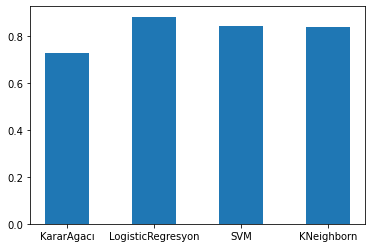

In [324]:
x = np.array([ "KararAgacı","LogisticRegresyon", "SVM", "KNeighborn"])
y = np.array([accuracy_score_karar_agaci, accuracy_score_logistic_regresyon, accuarry_SVM, accuarry_KN])

plt.bar(x,y, width=0.5)
plt.show()


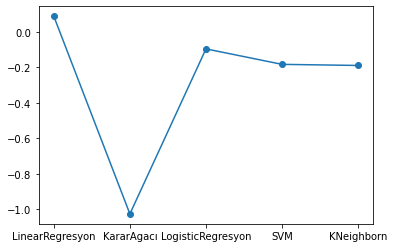

In [335]:
x = np.array(["LinearRegresyon", "KararAgacı","LogisticRegresyon", "SVM", "KNeighborn"])
y = np.array([r2_linear_regresyon,r2_karar_agaci,r2_logistic_regresyon,r2_score_SVM,r2_score_KN])
plt.plot(x,y, marker = 'o')
plt.show()


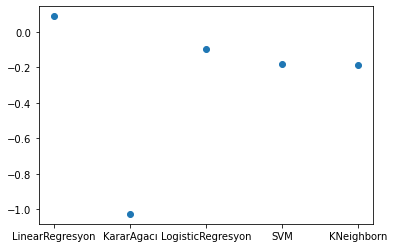

In [338]:
x = np.array(["LinearRegresyon", "KararAgacı","LogisticRegresyon", "SVM", "KNeighborn"])
ypoints = np.array([mean_error_linear_regresyon,mean_error_karar_agaci,mean_error_logistic_regresyon,mean_error_SVM,mean_error_KN])

plt.plot(x, y, 'o')
plt.show()

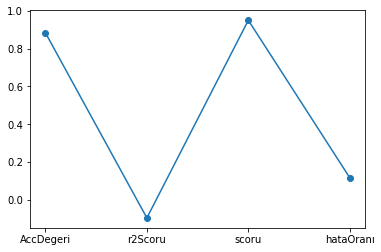

In [339]:
x = np.array(["AccDegeri", "r2Scoru","scoru", "hataOranı"])
y = np.array([accuracy_score_logistic_regresyon,r2_logistic_regresyon,score_logistic_regresyon,mean_error_logistic_regresyon])
plt.plot(x,y, marker = 'o')
plt.show()
